# Samila Demo

In [4]:
import sys
try:
  import google.colab
  !{sys.executable} -m pip -q -q install samila
except:
  pass

In [5]:
import matplotlib.pyplot as plt
import random
import math
from samila import GenerativeImage, Projection

## Basic Generation
If we call `generate` with no input parameters, we get a plot from two random equations

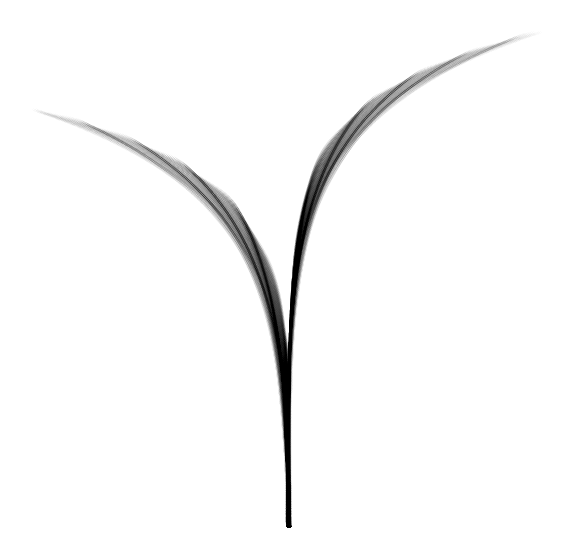

In [6]:
g1 = GenerativeImage()
g1.generate()
g1.plot()
plt.show()

## Assigning Functions
By defining `f1` and `f2`, we can control the general shape of the plot

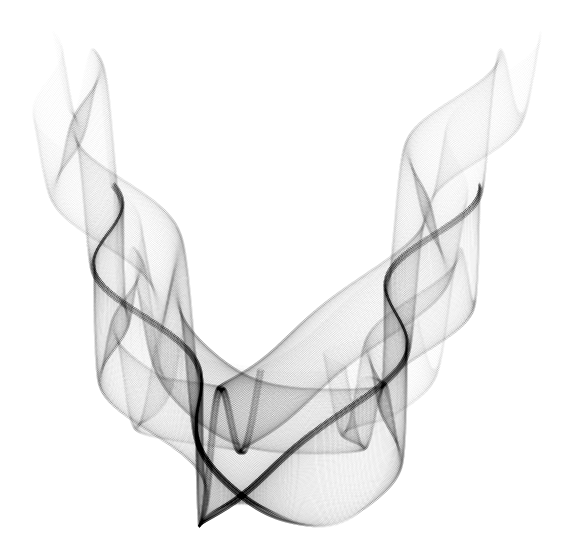

In [7]:
def f1(x, y):
    result = random.uniform(-1,1) * x**2  - math.sin(y**2) + abs(y-x)
    return result

def f2(x, y):
    result = random.uniform(-1,1) * y**3 - math.cos(x**2) + 2*x
    return result

g2 = GenerativeImage(f1, f2)
g2.generate()
g2.plot()
plt.show()

## Projection
We can use the `projection` attribute to define the coordinate system to transform our functions

The avaliable projections are `RECTILINEAR`, `POLAR`, `AITOFF`, `HAMMER`, `LAMBERT`, `MOLLWEIDE` and `RANDOM`

Projection.DEFAULT


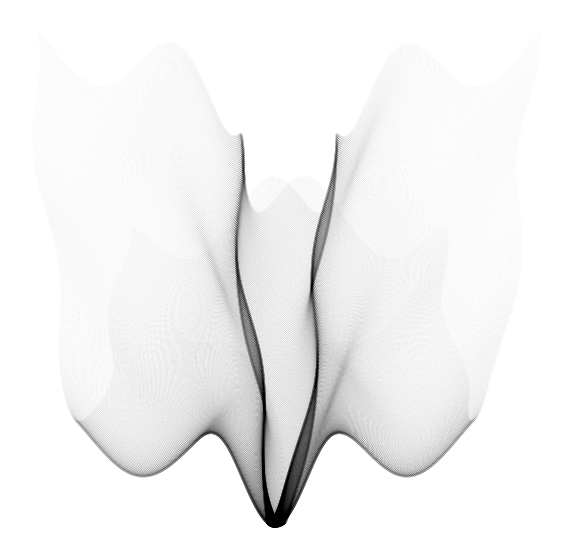

Projection.POLAR


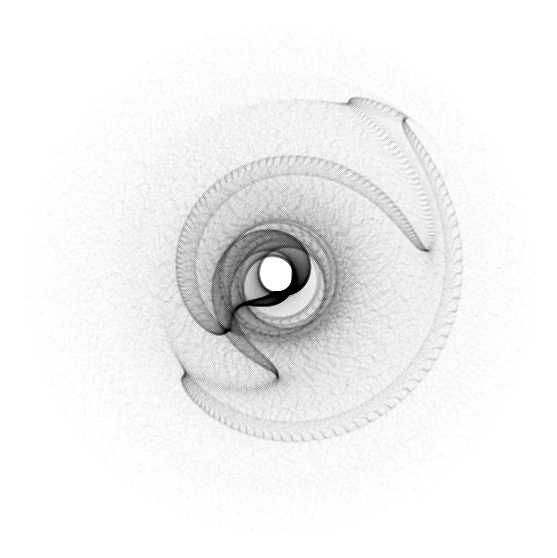

Projection.AITOFF


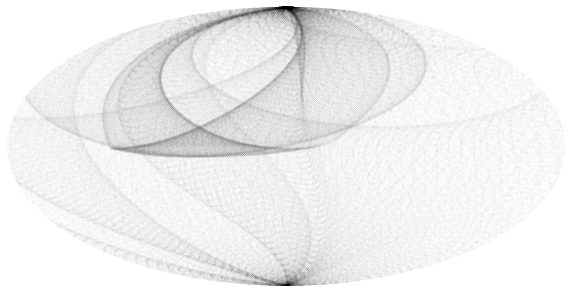

Projection.HAMMER


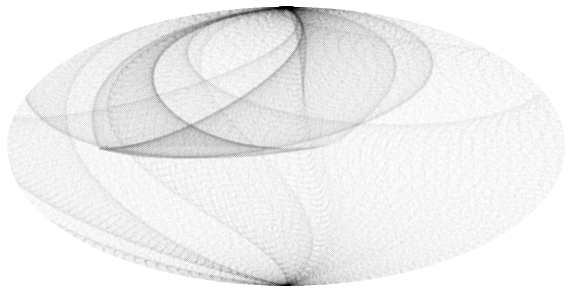

Projection.LAMBERT


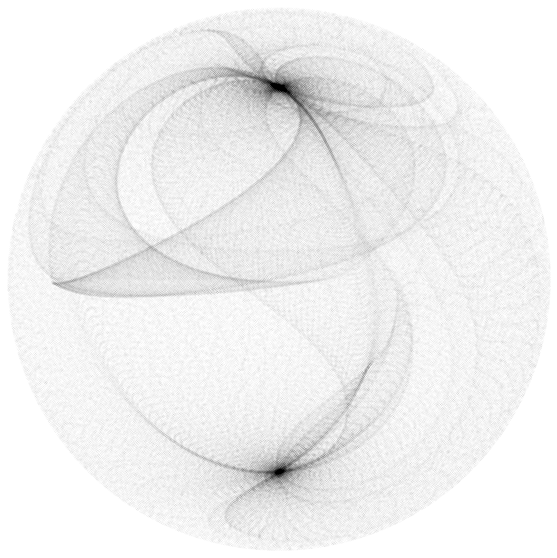

Projection.MOLLWEIDE


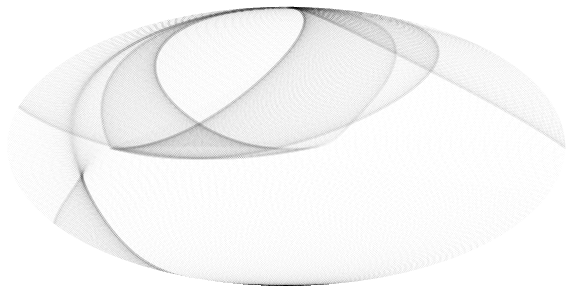

Projection.RANDOM


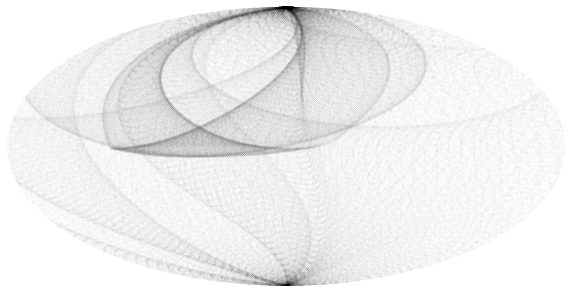

In [8]:
g2 = GenerativeImage(f1, f2)
g2.generate()

for p in list(Projection):
    print(p)
    g2.plot(projection=p)
    plt.show()
    plt.close()

## Range

Control the range over which the input values span

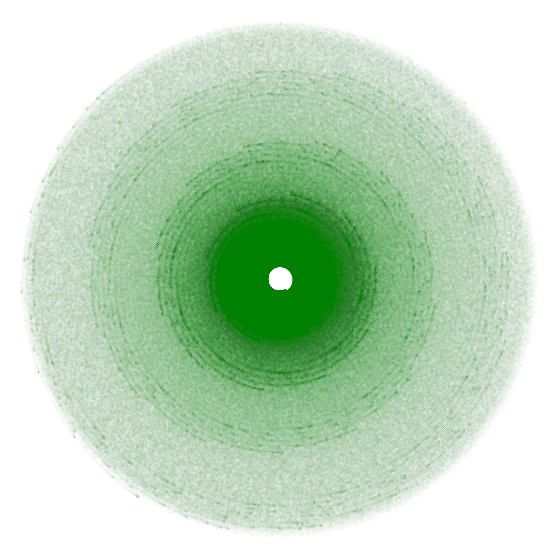

In [28]:
g2 = GenerativeImage(f1, f2)
g2.generate(start=-5.5*math.pi, step=0.010, stop=0)

g2.plot(color="green", bgcolor="white",projection=Projection.POLAR)
plt.show()

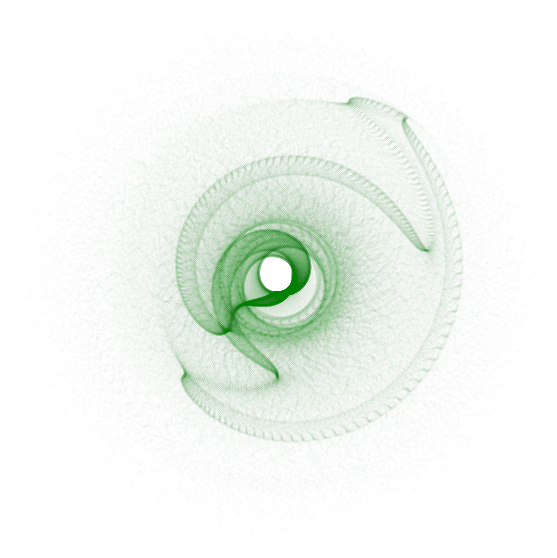

In [ ]:
g2 = GenerativeImage(f1, f2)
g2.generate()
g2.plot(color="green", bgcolor="white", projection=Projection.POLAR)
plt.show()

## Color

We can assign colors for both the background as well as the line

Supported colors are available in `VALID_COLORS` list


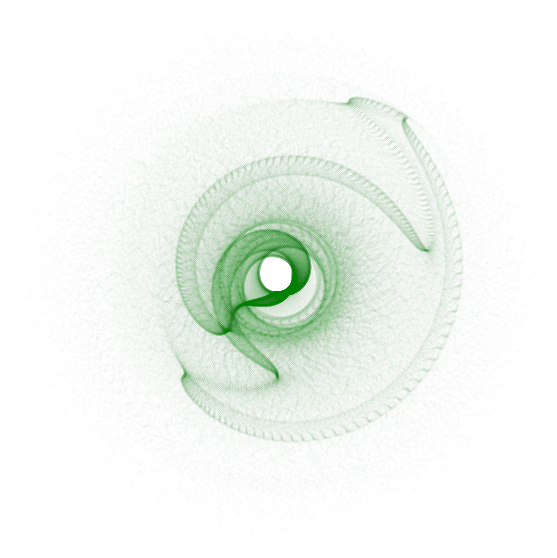

In [22]:
g2 = GenerativeImage(f1, f2)
g2.generate()
g2.plot(color="green", bgcolor="white", projection=Projection.POLAR)
plt.show()

* `color` and `bgcolor` parameters supported formats:

    1. Color name (example: `color="yellow"`)
    2. RGB/RGBA (example: `color=(0.1,0.1,0.1)`, `color=(0.1,0.1,0.1,0.1)`)
    3. Hex (example: `color="#eeefff"`)
    4. Random (example: `color="random"`)
    5. Complement (example: `color="complement", bgcolor="blue"`)
    6. Transparent (example: `bgcolor="transparent"`)

⚠️ **Transparent** mode is only available for background

## Spot Size

We can also change the size of the plot marker

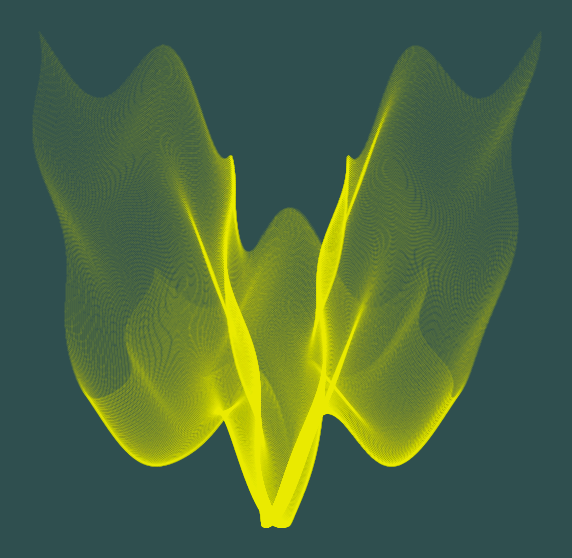

In [11]:
g2 = GenerativeImage(f1, f2)
g2.generate()
g2.plot(color="yellow", bgcolor="darkslategray", spot_size=0.25)
plt.show()

## Random Seeds
If we do not pass in a seed when calling `generate`, a random seed will be created for us

Passing this seed into `generate` will guarantee plot reproducibility

In [12]:
seed = g2.seed
print(seed)

561917


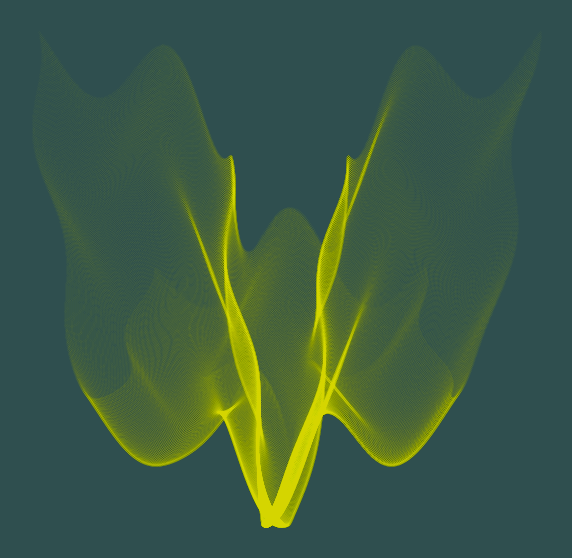

In [13]:
g2 = GenerativeImage(f1, f2)
g2.generate(seed)
g2.plot(color="yellow", bgcolor="darkslategray", spot_size=0.05)
plt.show()

## Saving Images

Save generated images

Use the `depth` attribute to increase the resolution

In [14]:
g2.save_image(file_adr="test.png")

{'message': '/content/test.png', 'status': True}

In [15]:
g2.save_image(file_adr="test_high_res.png", depth=3)

{'message': '/content/test_high_res.png', 'status': True}

## Saving Data

Save generated image data

It can then be loaded into a `GenerativeImage` instance

In [16]:
g2.save_data(file_adr="data.json")

{'message': '/content/data.json', 'status': True}

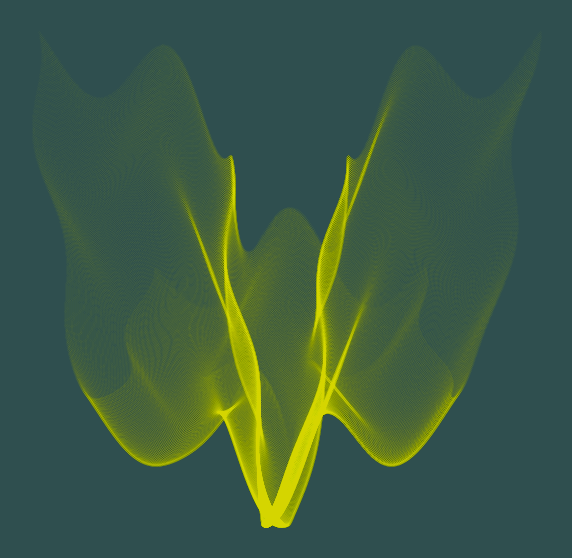

In [17]:
g2 = GenerativeImage(data=open('data.json', 'r'))
g2.plot()

## Saving Config

Save generated image config. It contains string formats of functions which is also human readable

It can then be loaded into a `GenerativeImage` instance

In [18]:
g1.save_config(file_adr="config.json")

{'message': '/content/config.json', 'status': True}

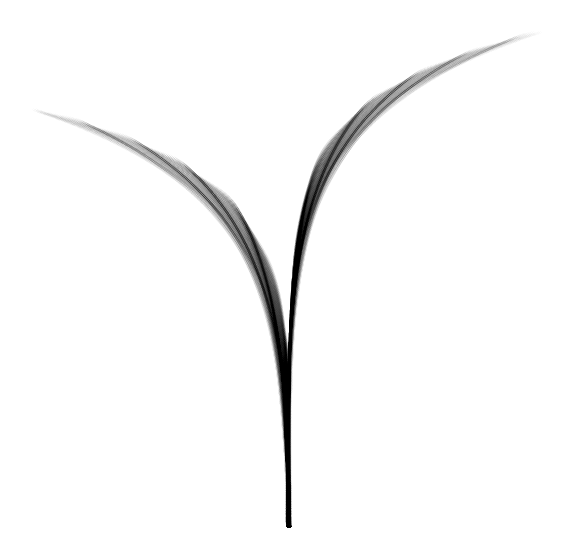

In [19]:
g1 = GenerativeImage(config=open('config.json', 'r'))
g1.generate()
g1.plot()

## NFT.storage

Upload generated image directly to [NFT.storage](https://nft.storage)

In [20]:
g1.nft_storage(api_key="YOUR_API_KEY")

{'message': 'API Key is malformed or failed to parse.', 'status': False}